In [39]:
import pandas as pd
import numpy as np
import warnings
from IPython.display import Image
warnings.filterwarnings('ignore')

pd.set_option('max_colwidth', 500)
pd.set_option('max_columns', 500)
pd.set_option('max_rows', 100)


In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
from collections import OrderedDict
import warnings
from matplotlib import pylab as plt
from sklearn import preprocessing
from IPython.display import Image
warnings.filterwarnings('ignore')

In [7]:
trn = pd.read_csv('train.csv')
tst = pd.read_csv('test.csv')

In [17]:
breed = pd.read_csv('breed_labels.csv')
color = pd.read_csv('color_labels.csv')
state = pd.read_csv('state_labels.csv')

In [15]:
breed.head()
#for col in breed.columns:
#    print('{}\n'.format(breed[col].head()))

,BreedID,Type,BreedName
0,1,1,Affenpinscher
1,2,1,Afghan Hound
2,3,1,Airedale Terrier
3,4,1,Akbash
4,5,1,Akita


In [11]:
breed.groupby('Type')['BreedName'].nunique()
#강아지가 241가지 고양이가 66가지 있음

Type
1    241
2     66
Name: BreedName, dtype: int64

In [24]:
cat_cols = [col for col in state.columns[:24] if state[col].dtype in ['O']]
state[cat_cols].describe()

,StateName
count,15
unique,15
top,Kelantan
freq,1


In [1]:
# StateName 은 15개

In [16]:
color.head()

,ColorID,ColorName
0,1,Black
1,2,Brown
2,3,Golden
3,4,Yellow
4,5,Cream


In [17]:
state.head()

,StateID,StateName
0,41336,Johor
1,41325,Kedah
2,41367,Kelantan
3,41401,Kuala Lumpur
4,41415,Labuan


In [21]:
trn.head(3)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,is_train
0,2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He is energetic and playful. I rescued a couple of cats a few months ago but could not get them neutered in time as the clinic was fully scheduled. The result was this little kitty. I do not have enough space and funds to care for more cats in my household. Looking for responsible people to take over Nibble's care.,86e1089a3,1.0,2,True
1,2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartment. It was shaking so I had to bring it home to provide temporary care.,6296e909a,2.0,0,True
2,1,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,"Their pregnant mother was dumped by her irresponsible owner at the roadside near some shops in Subang Jaya. Gave birth to them at the roadside. They are all healthy and adorable puppies. Already dewormed, vaccinated and ready to go to a home. No tying or caging for long hours as guard dogs. However, it is acceptable to cage or tie for precautionary purposes. Interested to adopt pls call me.",3422e4906,7.0,3,True


In [13]:
trn = trn.assign(is_train=True)
tst = tst.assign(is_train=False)
tst = tst.assign(AdoptionSpeed=-1)
data = pd.concat([trn, tst], sort=True)

In [19]:
data_color1 = data.merge(color, how='left', left_on='Color1', right_on='ColorID', left_index=False, right_index=False).drop(columns='ColorID')
data_color2 = data_color1.merge(color, how='left', left_on='Color2', right_on='ColorID').drop(columns='ColorID')
data_color3 = data_color2.merge(color, how='left', left_on='Color3', right_on='ColorID').drop(columns='ColorID')

In [20]:
data = data_color3

In [22]:
data_breed1 = data.merge(breed, how='left', left_on=['Breed1','Type'], right_on=['BreedID','Type'], left_index=False, right_index=False).drop(columns='BreedID')
data_breed2 = data_breed1.merge(breed, how='left', left_on=['Breed2','Type'], right_on=['BreedID','Type']).drop(columns='BreedID')


In [23]:
data = data_breed2

In [24]:
data_state = data.merge(state, how='left', left_on='State', right_on='StateID', left_index=False, right_index=False).drop(columns='StateID')

In [25]:
data = data_state

In [26]:
data.drop(columns=['Breed1', 'Breed2', 'Color1', 'Color2', 'Color3', 'State'], inplace=True)

In [27]:
data= data.replace({'Type': {1:'Dog', 2:'Cat'},
                   'Gender': {1:'Male', 2:'Female', 3:'Mixed'},
                    'Vaccinated' : {1:'Yes', 2:'No', 3:'Not Sure'},
                    'Dewormed' : {1: 'Yes', 2: 'No', 3: 'Not Sure'},
                    'Sterilized' : {1: 'Yes', 2: 'No', 3: 'Not Sure'}
                   })

In [31]:
data.columns

Index(['AdoptionSpeed', 'Age', 'Description', 'Dewormed', 'Fee', 'FurLength',
       'Gender', 'Health', 'MaturitySize', 'Name', 'PetID', 'PhotoAmt',
       'Quantity', 'RescuerID', 'Sterilized', 'Type', 'Vaccinated', 'VideoAmt',
       'is_train', 'ColorName_x', 'ColorName_y', 'ColorName', 'BreedName_x',
       'BreedName_y', 'StateName'],
      dtype='object')

In [34]:
mapping= {
    'ColorName_x': 'ColorName1',
    'ColorName_y': 'ColorName2',
    'ColorName': 'ColorName3',
    'BreedName_x': 'BreedName1',
    'BreedName_y': 'BreedName2'
}

data.columns = [mapping[colname] if colname in mapping.keys() else colname for colname in data.columns]

In [35]:
data.head()

,AdoptionSpeed,Age,Description,Dewormed,Fee,FurLength,Gender,Health,MaturitySize,Name,PetID,PhotoAmt,Quantity,RescuerID,Sterilized,Type,Vaccinated,VideoAmt,is_train,ColorName1,ColorName2,ColorName3,BreedName1,BreedName2,StateName
0,2,3,Nibble is a 3+ month old ball of cuteness. He is energetic and playful. I rescued a couple of cats a few months ago but could not get them neutered in time as the clinic was fully scheduled. The result was this little kitty. I do not have enough space and funds to care for more cats in my household. Looking for responsible people to take over Nibble's care.,No,100,1,Male,1,1,Nibble,86e1089a3,1.0,1,8480853f516546f6cf33aa88cd76c379,No,Cat,No,0,True,Black,White,NaN,Tabby,NaN,Selangor
1,0,1,I just found it alone yesterday near my apartment. It was shaking so I had to bring it home to provide temporary care.,Not Sure,0,2,Male,1,2,No Name Yet,6296e909a,2.0,1,3082c7125d8fb66f7dd4bff4192c8b14,Not Sure,Cat,Not Sure,0,True,Black,Brown,NaN,Domestic Medium Hair,NaN,Kuala Lumpur
2,3,1,"Their pregnant mother was dumped by her irresponsible owner at the roadside near some shops in Subang Jaya. Gave birth to them at the roadside. They are all healthy and adorable puppies. Already dewormed, vaccinated and ready to go to a home. No tying or caging for long hours as guard dogs. However, it is acceptable to cage or tie for precautionary purposes. Interested to adopt pls call me.",Yes,0,2,Male,1,2,Brisco,3422e4906,7.0,1,fa90fa5b1ee11c86938398b60abc32cb,No,Dog,Yes,0,True,Brown,White,NaN,Mixed Breed,NaN,Selangor
3,2,4,"Good guard dog, very alert, active, obedience waiting for her good master, plz call or sms for more details if you really get interested, thanks!!",Yes,150,1,Female,1,2,Miko,5842f1ff5,8.0,1,9238e4f44c71a75282e62f7136c6b240,No,Dog,Yes,0,True,Black,Brown,NaN,Mixed Breed,NaN,Kuala Lumpur
4,2,1,"This handsome yet cute boy is up for adoption. He is the most playful pal we've seen in our puppies. He loves to nibble on shoelaces , Chase you at such a young age. Imagine what a cute brat he will be when he grows. We are looking for a loving home for Hunter , one that will take care of him and give him the love that he needs. Please call urgently if you would like to adopt this cutie.",No,0,1,Male,1,2,Hunter,850a43f90,3.0,1,95481e953f8aed9ec3d16fc4509537e8,No,Dog,No,0,True,Black,NaN,NaN,Mixed Breed,NaN,Selangor


In [40]:
data.to_parquet('merged_data', compression='GZIP')

In [87]:
import feather

In [88]:
feather.write_dataframe(data, 'merged_data.feather') 

In [83]:
###!conda install -c conda-forge fastparquet
!conda install feather-format -c conda-forge -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.6.1
  latest version: 4.6.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /anaconda3/envs/kaggle_env

  added / updated specs:
    - feather-format


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.6.2                |           py36_0         875 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         875 KB

The following packages will be UPDATED:

  conda                       pkgs/main::conda-4.6.1-py36_0 --> conda-forge::conda-4.6.2-py36_0



conda-4.6.2          | 875 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [79]:
data = pd.read_parquet('merged_data')

In [42]:
data.columns

Index(['AdoptionSpeed', 'Age', 'Description', 'Dewormed', 'Fee', 'FurLength',
       'Gender', 'Health', 'MaturitySize', 'Name', 'PetID', 'PhotoAmt',
       'Quantity', 'RescuerID', 'Sterilized', 'Type', 'Vaccinated', 'VideoAmt',
       'is_train', 'ColorName1', 'ColorName2', 'ColorName3', 'BreedName1',
       'BreedName2', 'StateName'],
      dtype='object')

In [45]:
explicit_predictors = ['Type', 'Age', 'Gender', 'MaturitySize', 'Vaccinated', 'Dewormed','Sterilized', 'Health', 'Fee']
implicit_predictors1 = ['BreedName1', 'BreedName2', 'ColorName1', 'ColorName2', 'ColorName3', 'FurLength', 'StateName']
implicit_predictors2 = ['VideoAmt', 'Description', 'PhotoAmt']


In [46]:
df = data[explicit_predictors + ['AdoptionSpeed', 'is_train']]

In [47]:
df_implicit = data[implicit_predictors1 + ['AdoptionSpeed', 'is_train', 'Type']]

In [48]:
df = df.loc[df.is_train].drop(columns=['is_train'])
df_implicit = df_implicit.loc[df_implicit.is_train].drop(columns=['is_train'])

In [49]:
df.head(3)

,Type,Age,Gender,MaturitySize,Vaccinated,Dewormed,Sterilized,Health,Fee,AdoptionSpeed
index,,,,,,,,,,
0,Cat,3,Male,1,No,No,No,1,100,2
1,Cat,1,Male,2,Not Sure,Not Sure,Not Sure,1,0,0
2,Dog,1,Male,2,Yes,Yes,No,1,0,3


In [44]:
for col in trn.columns:
    print('{}\n'.format(trn[col].head()))

0    2
1    2
2    1
3    1
4    1
Name: Type, dtype: int64

0         Nibble
1    No Name Yet
2         Brisco
3           Miko
4         Hunter
Name: Name, dtype: object

0    3
1    1
2    1
3    4
4    1
Name: Age, dtype: int64

0    299
1    265
2    307
3    307
4    307
Name: Breed1, dtype: int64

0    0
1    0
2    0
3    0
4    0
Name: Breed2, dtype: int64

0    1
1    1
2    1
3    2
4    1
Name: Gender, dtype: int64

0    1
1    1
2    2
3    1
4    1
Name: Color1, dtype: int64

0    7
1    2
2    7
3    2
4    0
Name: Color2, dtype: int64

0    0
1    0
2    0
3    0
4    0
Name: Color3, dtype: int64

0    1
1    2
2    2
3    2
4    2
Name: MaturitySize, dtype: int64

0    1
1    2
2    2
3    1
4    1
Name: FurLength, dtype: int64

0    2
1    3
2    1
3    1
4    2
Name: Vaccinated, dtype: int64

0    2
1    3
2    1
3    1
4    2
Name: Dewormed, dtype: int64

0    2
1    3
2    2
3    2
4    2
Name: Sterilized, dtype: int64

0    1
1    1
2    1
3    1
4    1
Name: Heal

In [2]:
# RescuerID, Description, PetID, Name 은 중요변수가 아닌것으로 판단되어 우선 제외하고 분석시작

In [5]:
trn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
Type             14993 non-null int64
Name             13736 non-null object
Age              14993 non-null int64
Breed1           14993 non-null int64
Breed2           14993 non-null int64
Gender           14993 non-null int64
Color1           14993 non-null int64
Color2           14993 non-null int64
Color3           14993 non-null int64
MaturitySize     14993 non-null int64
FurLength        14993 non-null int64
Vaccinated       14993 non-null int64
Dewormed         14993 non-null int64
Sterilized       14993 non-null int64
Health           14993 non-null int64
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null int64
RescuerID        14993 non-null object
VideoAmt         14993 non-null int64
Description      14981 non-null object
PetID            14993 non-null object
PhotoAmt         14993 non-null float64
AdoptionSpe

In [6]:
num_cols = [col for col in trn.columns[:24] if trn[col].dtype in ['int64', 'float64']]
trn[num_cols].describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,1.457614,10.452078,265.272594,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,1.467485,1.731208,1.558727,1.914227,1.036617,1.576069,21.259988,41346.028347,0.056760,3.889215,2.516441
std,0.498217,18.155790,60.056818,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,0.599070,0.667649,0.695817,0.566172,0.199535,1.472477,78.414548,32.444153,0.346185,3.487810,1.177265
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000,2.000000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000,2.000000
75%,2.000000,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000,4.000000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000,4.000000


In [ ]:
# fee 의 경우 75%까지 0 이므로 fee 가 있고 없고로 구분하는 것이 더 나을듯
# VideoAmt 의 경우 75%까지 0 이므로 fee 가 있고 없고로 구분하는 것이 더 나을듯
# Quantity 는 75%까지 1마리이나 최대 20마리이다


In [7]:
cat_cols = [col for col in trn.columns[:24] if trn[col].dtype in ['O']]
trn[cat_cols].describe()

,Name,RescuerID,Description,PetID
count,13736,14993,14981,14993
unique,9060,5595,14032,14993
top,Baby,fa90fa5b1ee11c86938398b60abc32cb,For Adoption,da928b2cd
freq,66,459,164,1


In [3]:
# Name: 66
# RescuerID : 459
# Description : 164


In [26]:
trn.Age_year = trn.Age/12

/anaconda3/envs/kaggle_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [8]:
for col in cat_cols:
    uniq = np.unique(trn[col].astype(str))
    print('-' * 50)
    print('# col {}, n_uniq {}, uniq {}'.format(col, len(uniq), uniq))

--------------------------------------------------
# col Name, n_uniq 9061, uniq ['!' '! Med Long Fur Kittens' '!!! URGENT!!!' ...
 'ð\x9f\x92\x97ð\x9f\x92\x97Solid Black Kittenð\x9f\x92\x97ð\x9f\x92\x97'
 'ð\x9f\x92\x9cð\x9f\x92\x9b 3 Kittens & A Mama ð\x9f\x92\x9cð\x9f\x92\x96'
 'ð\x9f\x92°ð\x9f\x90¾88ð\x9f\x90¾ð\x9f\x92°FattFatt']
--------------------------------------------------
# col RescuerID, n_uniq 5595, uniq ['0007e457eb0583479bb888d54764911f' '0008ef529da74e9701db7eaaa4d9115a'
 '000a5830787b64da2d61b0bbceb7676d' ... 'ffe9d666deaad333538c341dc3a39d9a'
 'ffed83297757c1c19681024e7ee670aa' 'fff59afa6278380c938b2a5880ecae79']
--------------------------------------------------
# col Description, n_uniq 14033, uniq [' McD. Loving & docile. Gives kisses. Manja. She will make you fall in love with her sweet nature. Vaccinated & spayed.'
 '" Stripey" Home Born 2 month year old kitten, Potty trained. White with grey stripes. Adventurous and Highly Curious. Inquisitive and Playful. Firs

In [55]:
# 시각화 준비
import matplotlib
import matplotlib.pyplot as plt
# Jupyter Notebook 내부에 그래프를 출력하도록 설정
%matplotlib inline
import seaborn as sns

col :  Type


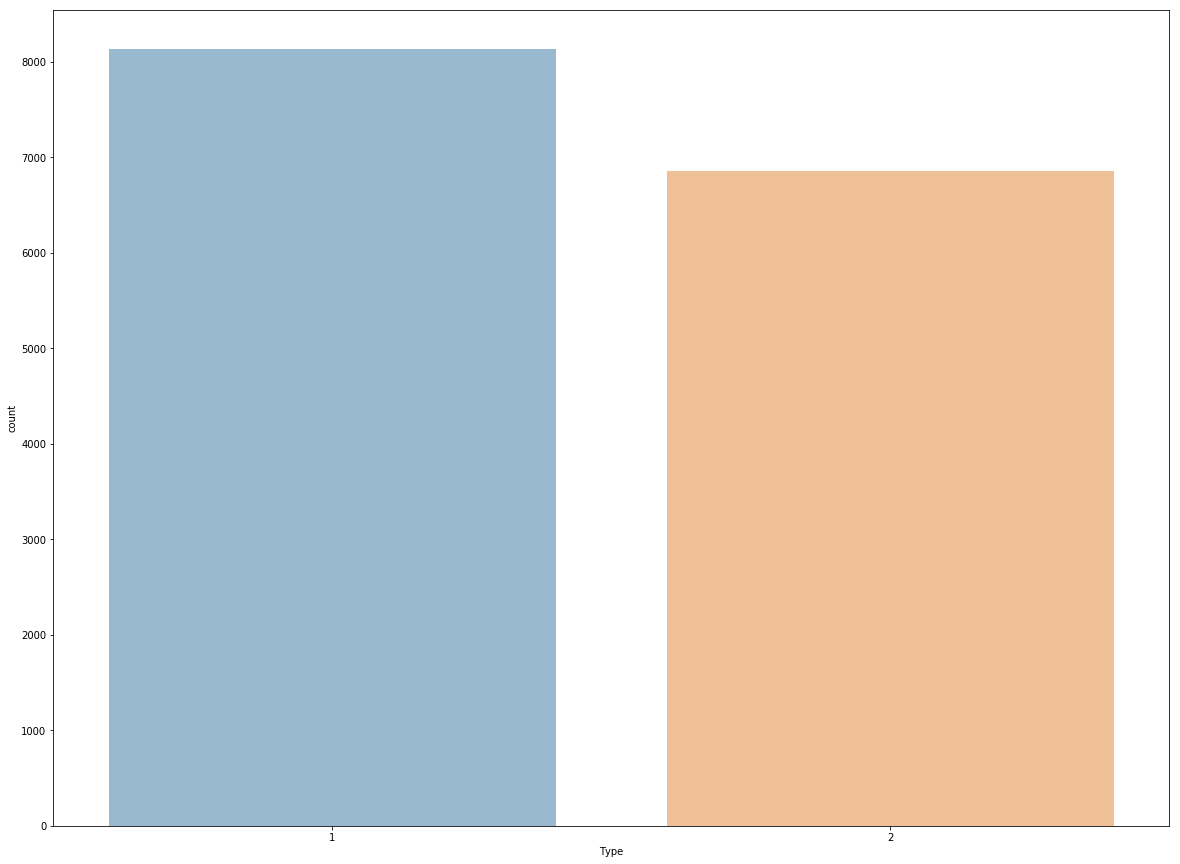

col :  Age


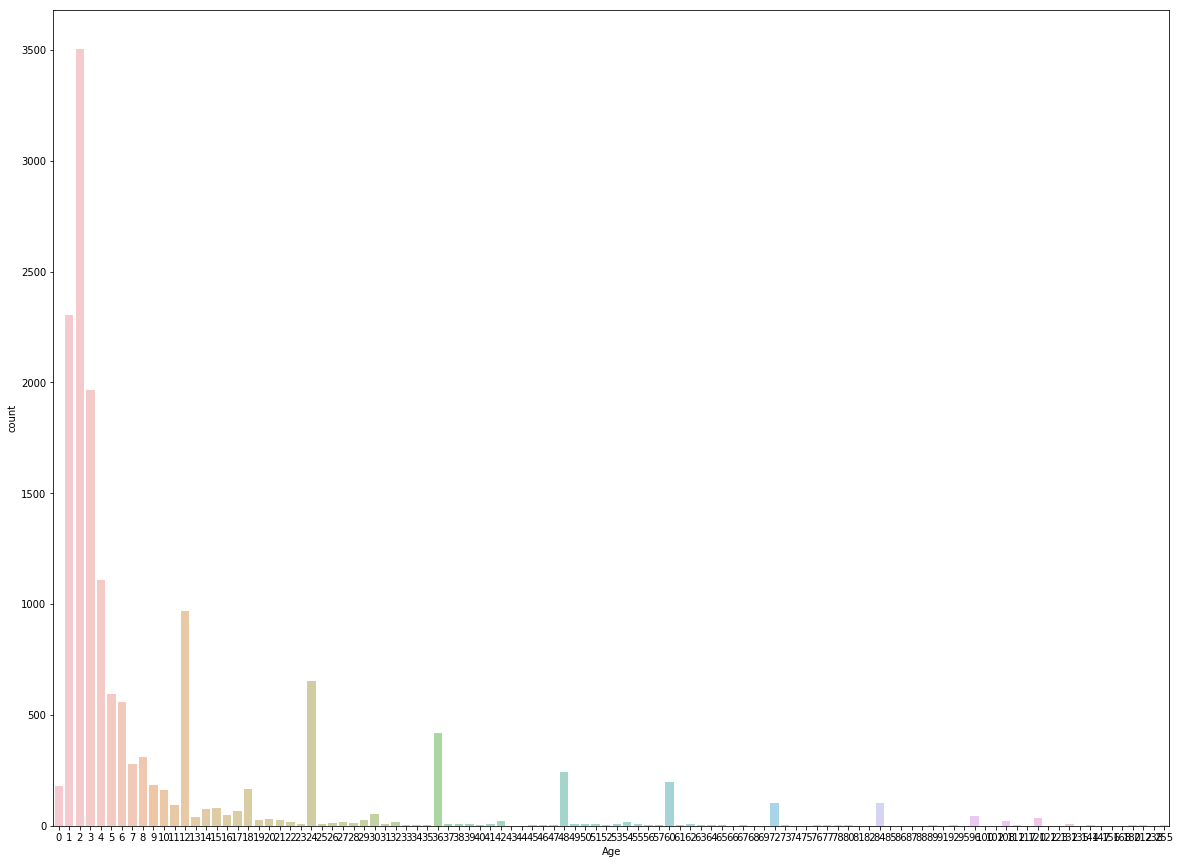

col :  Breed1


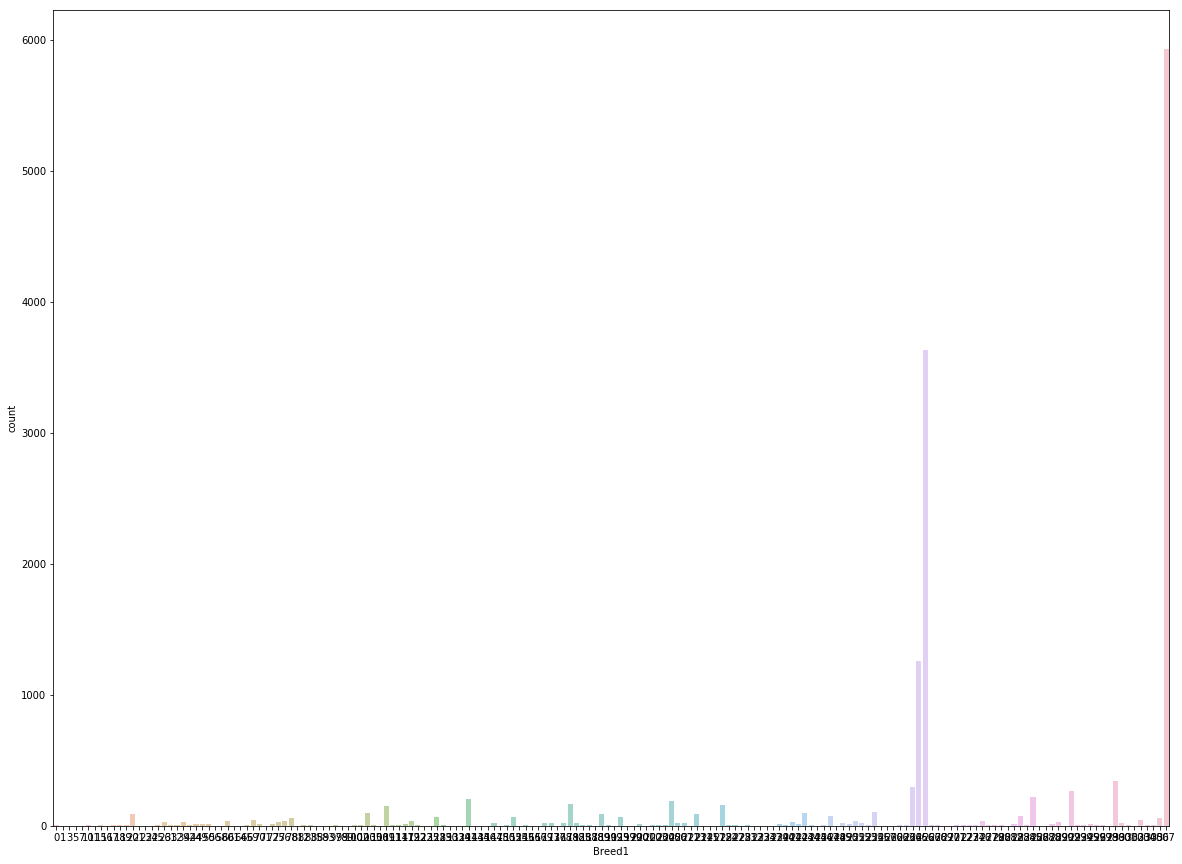

col :  Breed2


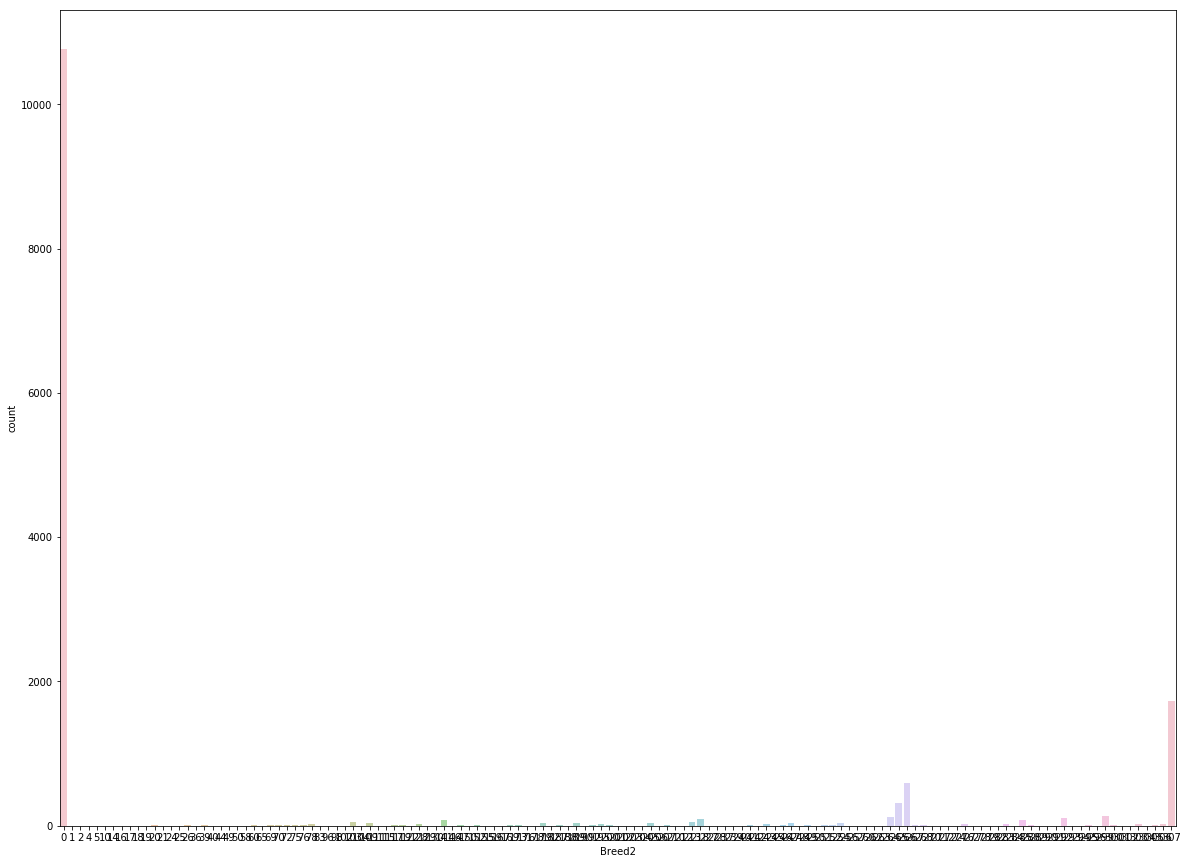

col :  Gender


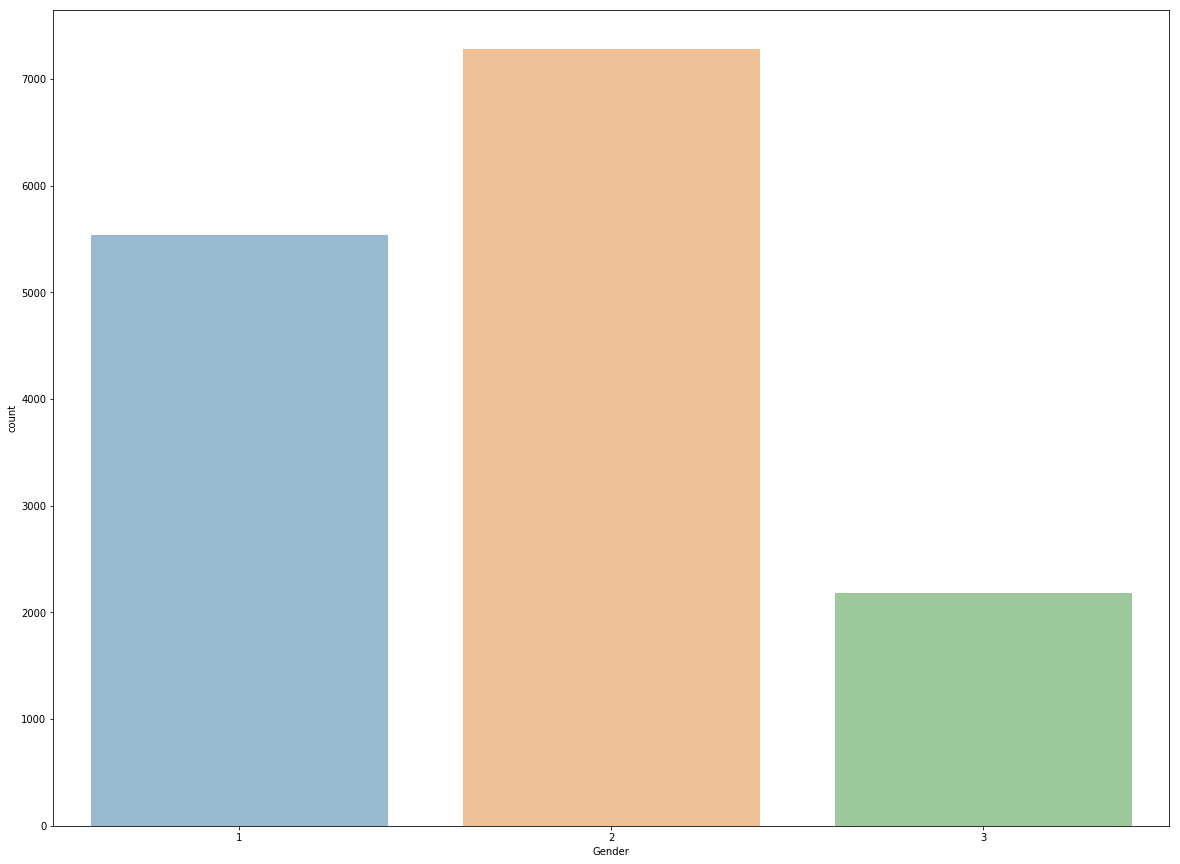

col :  Color1


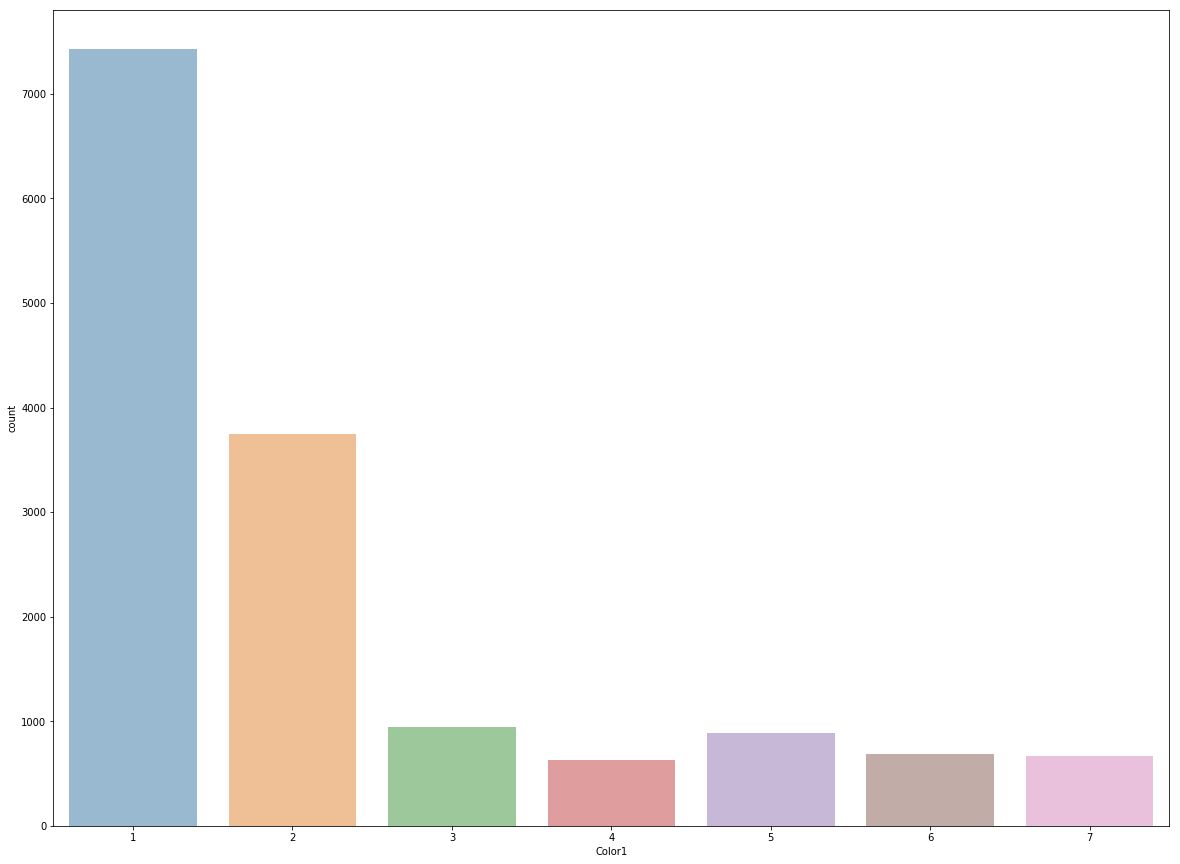

col :  Color2


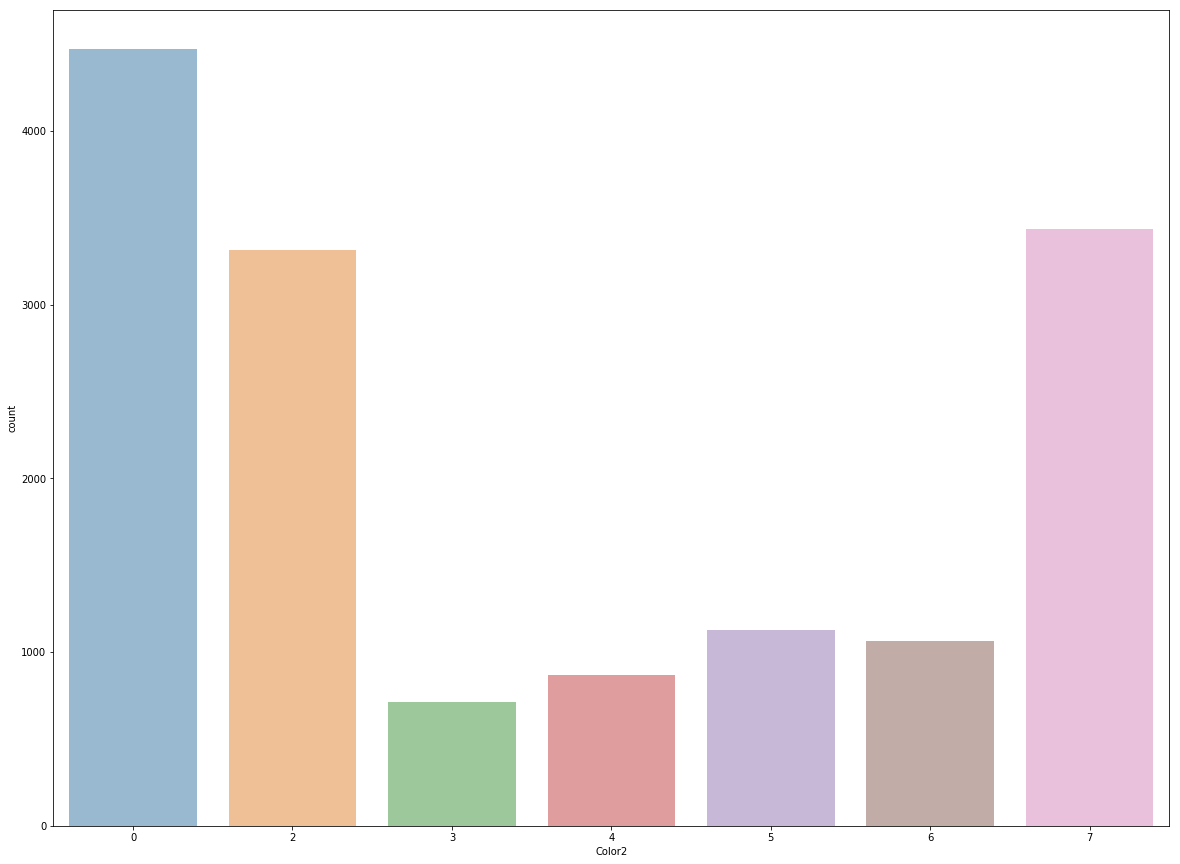

col :  Color3


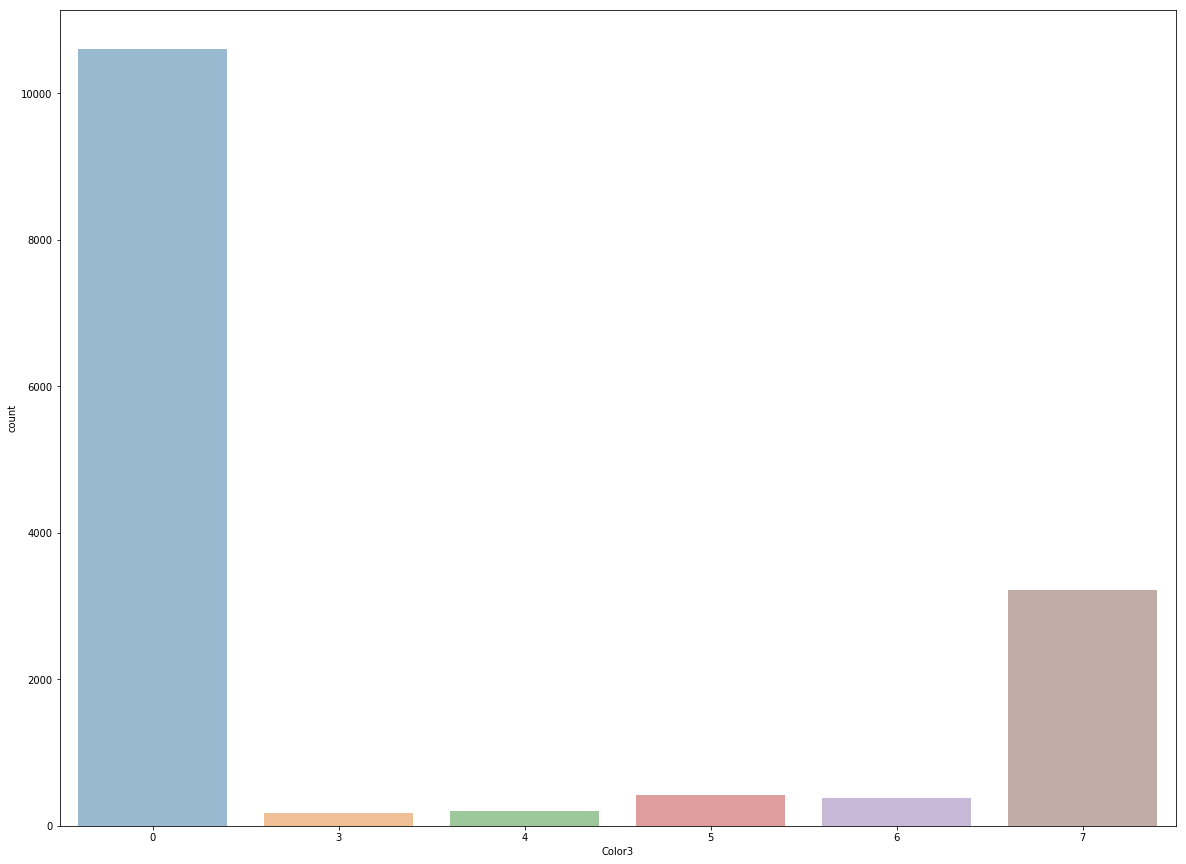

col :  MaturitySize


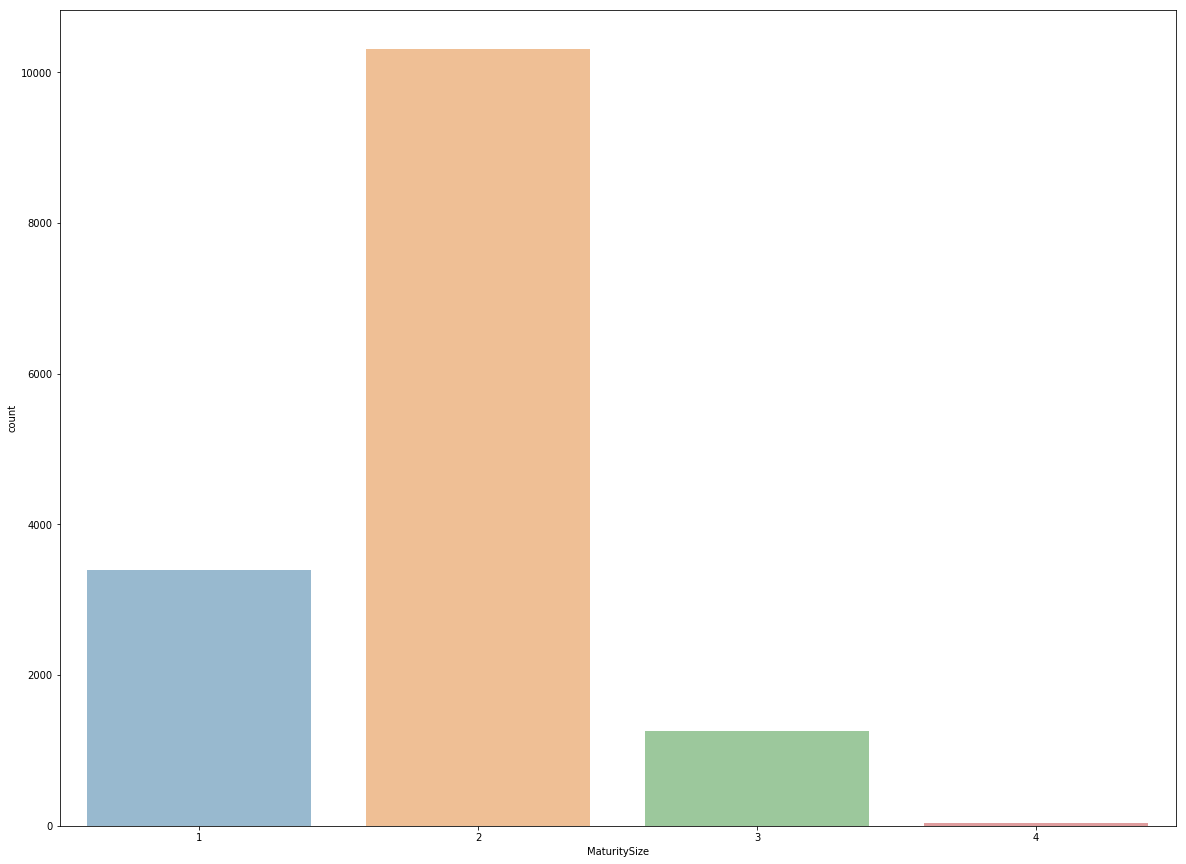

col :  FurLength


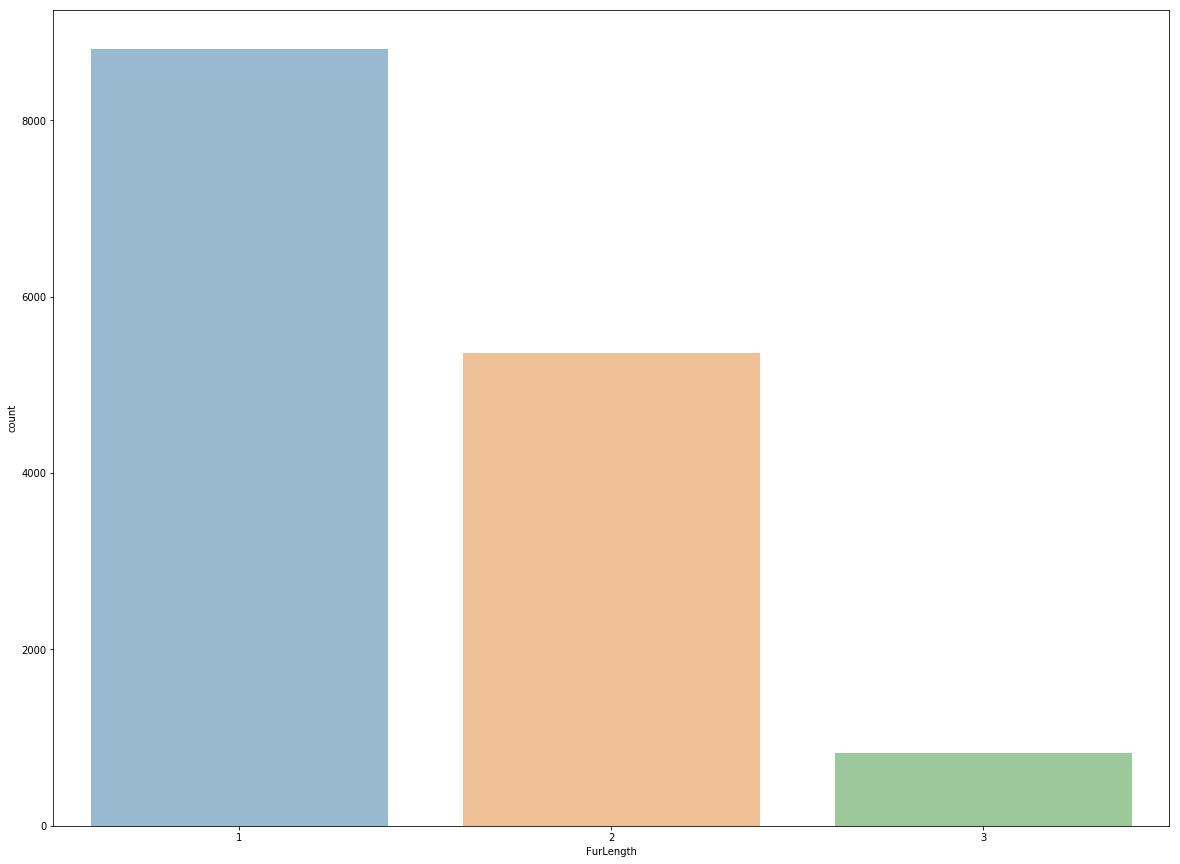

col :  Vaccinated


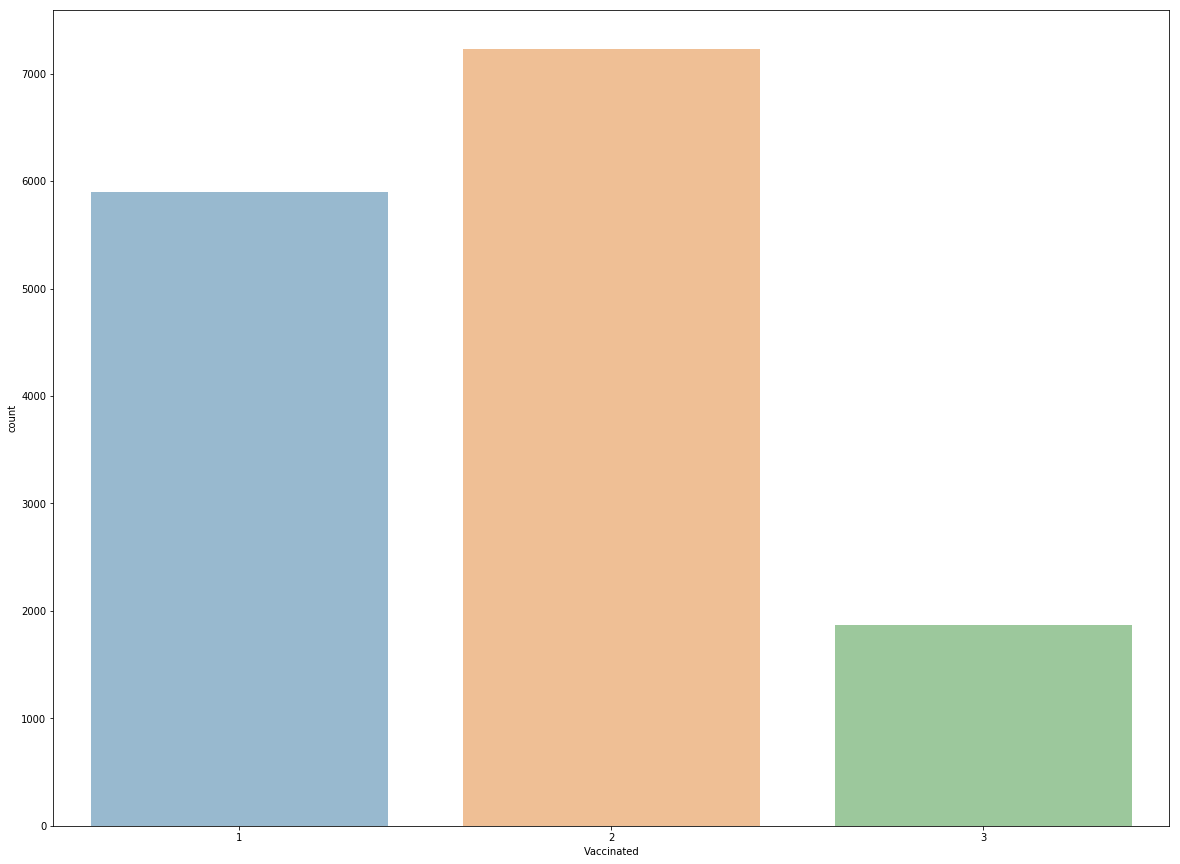

col :  Dewormed


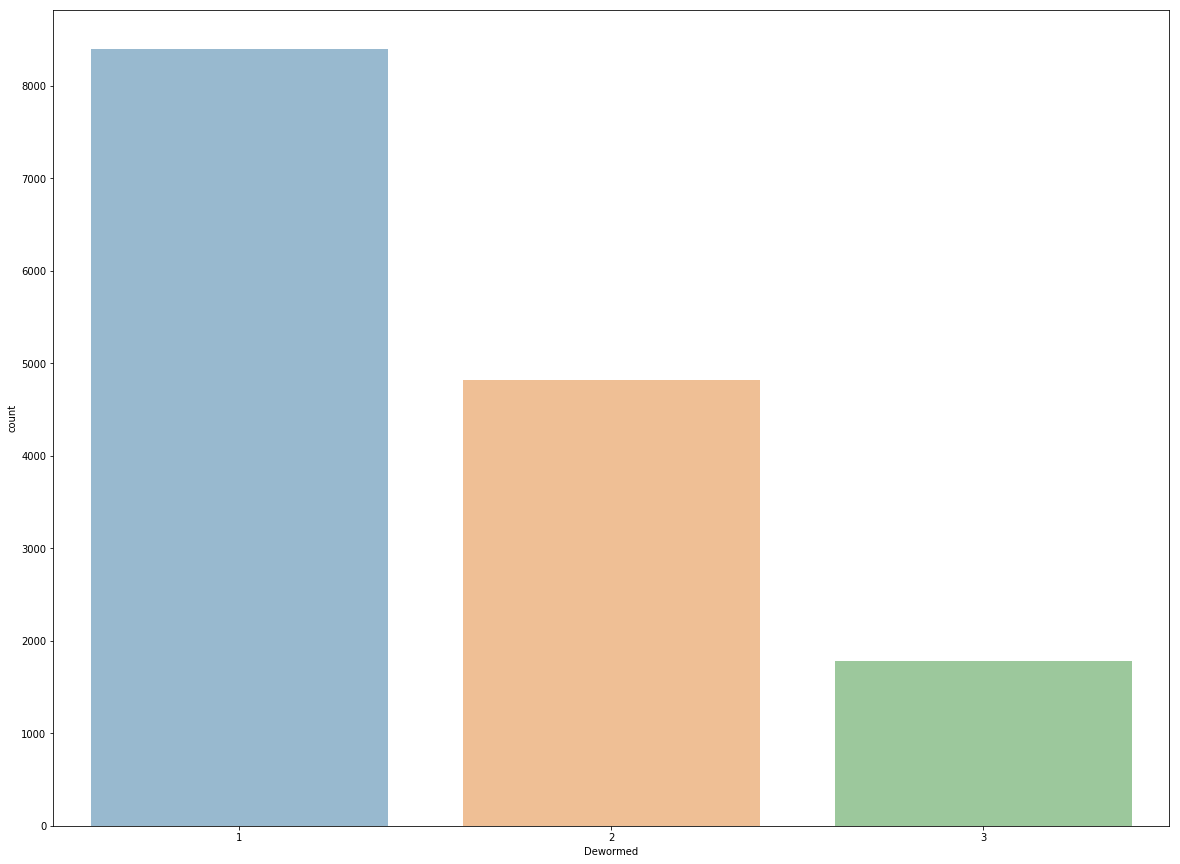

col :  Sterilized


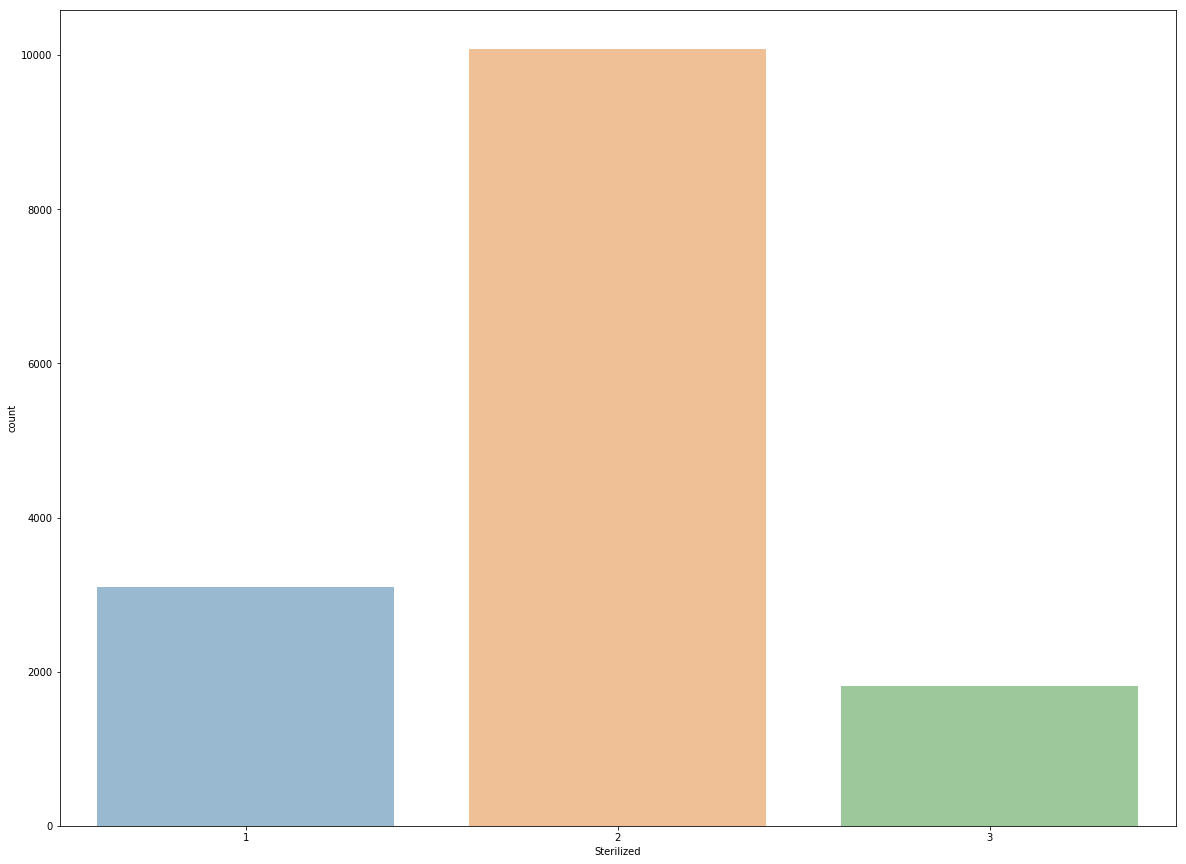

col :  Health


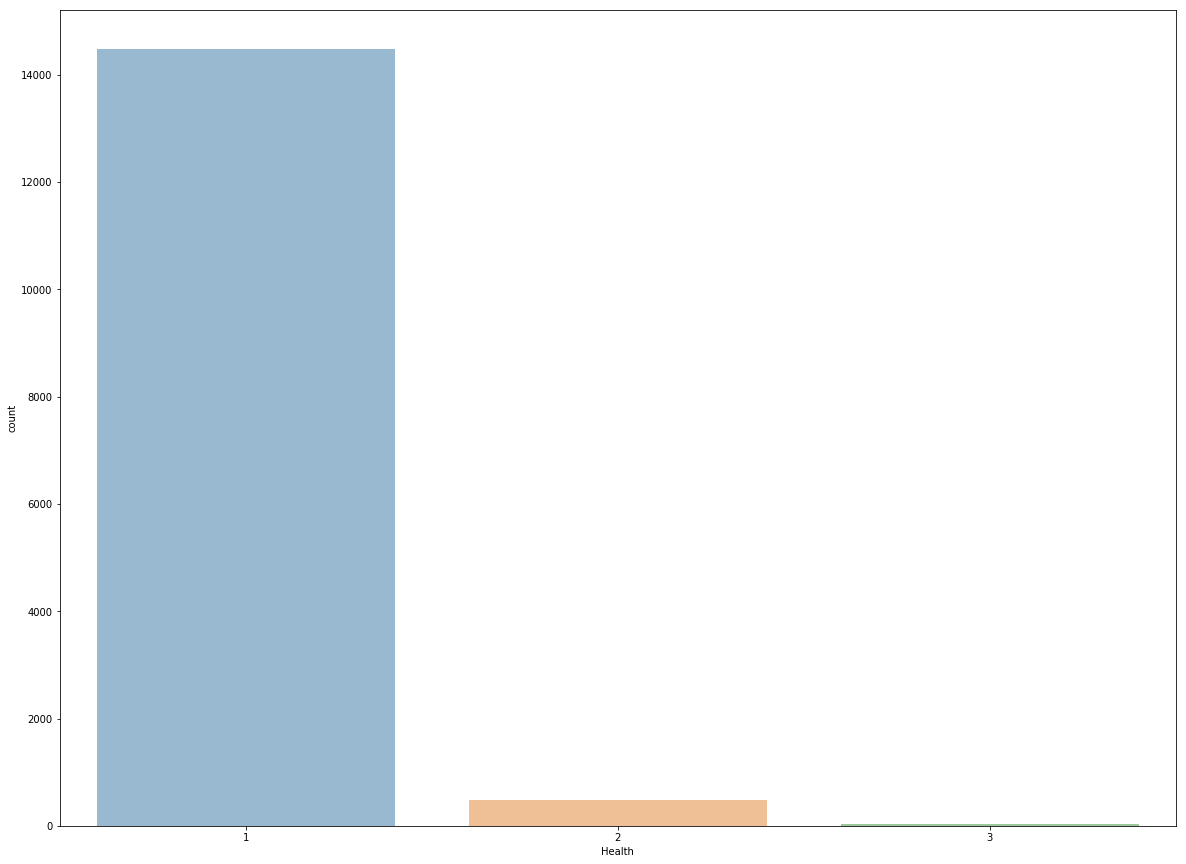

col :  Quantity


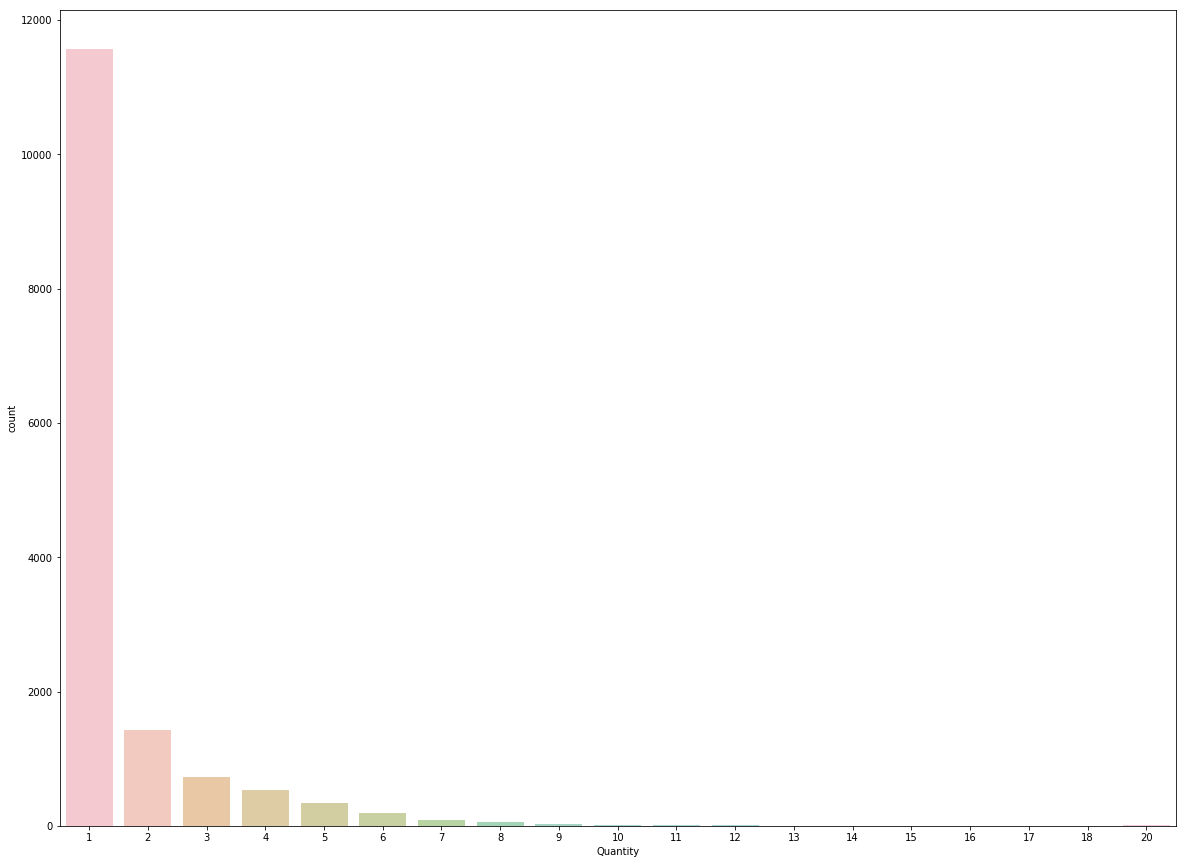

col :  Fee


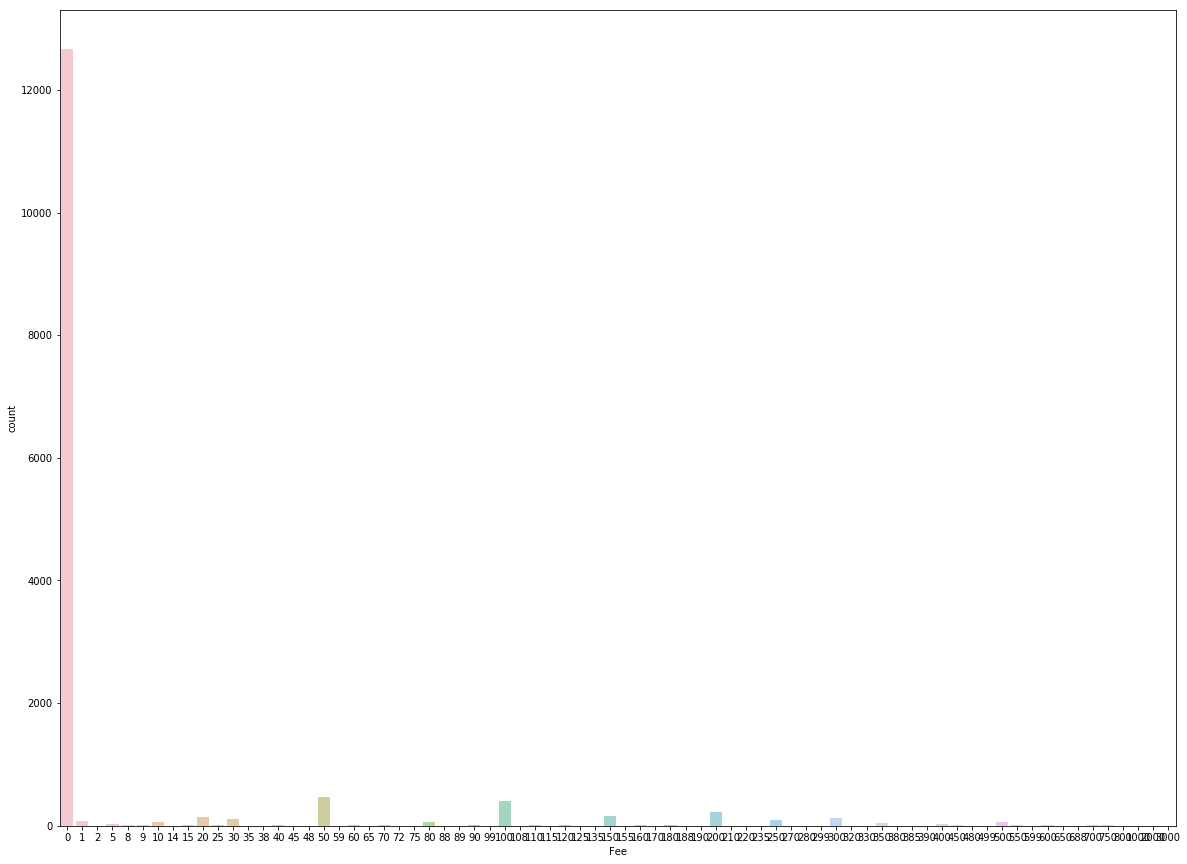

col :  State


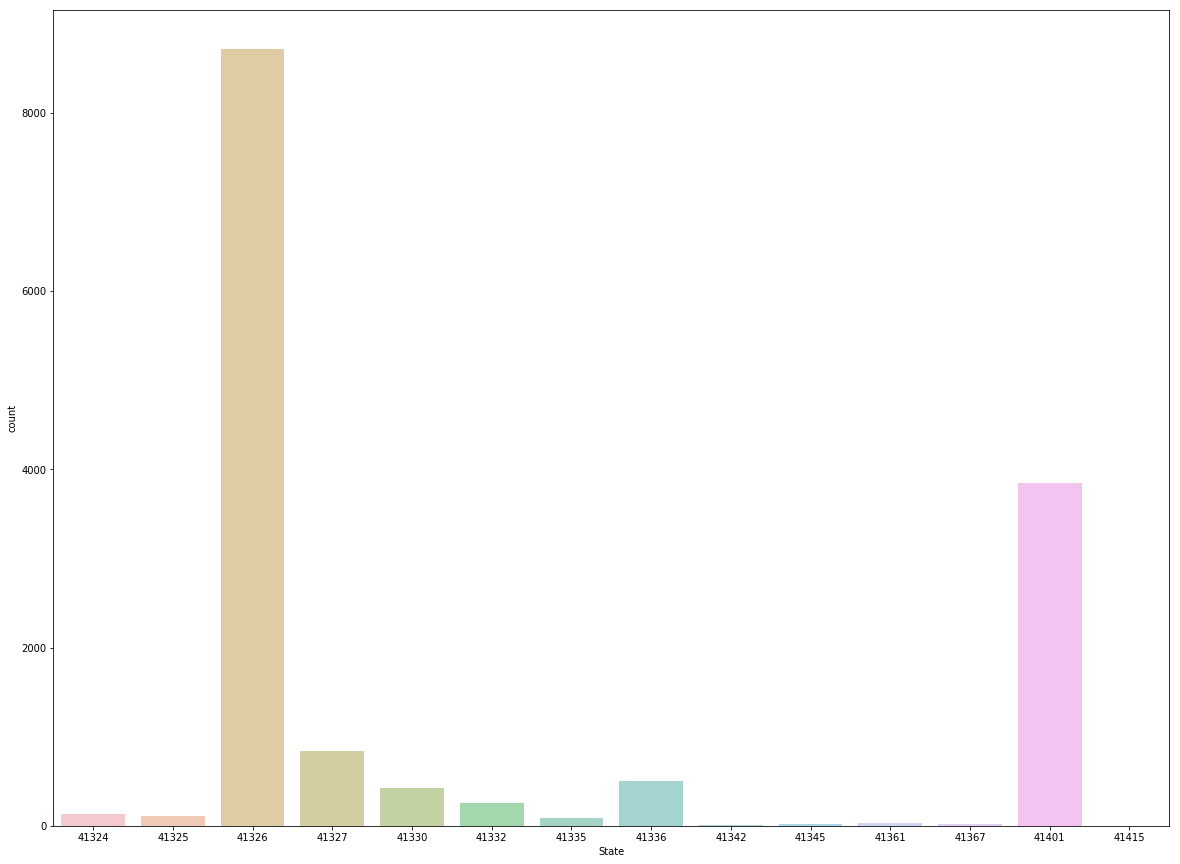

col :  VideoAmt


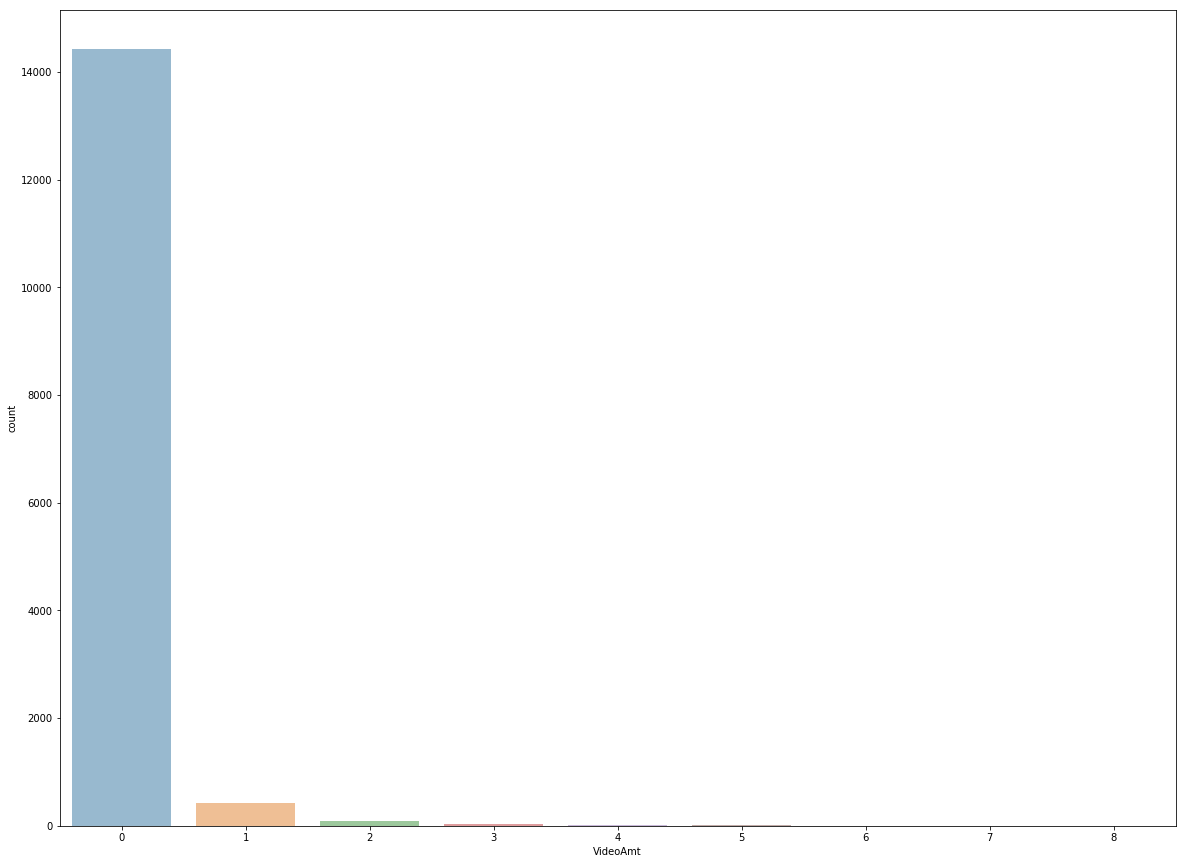

col :  PhotoAmt


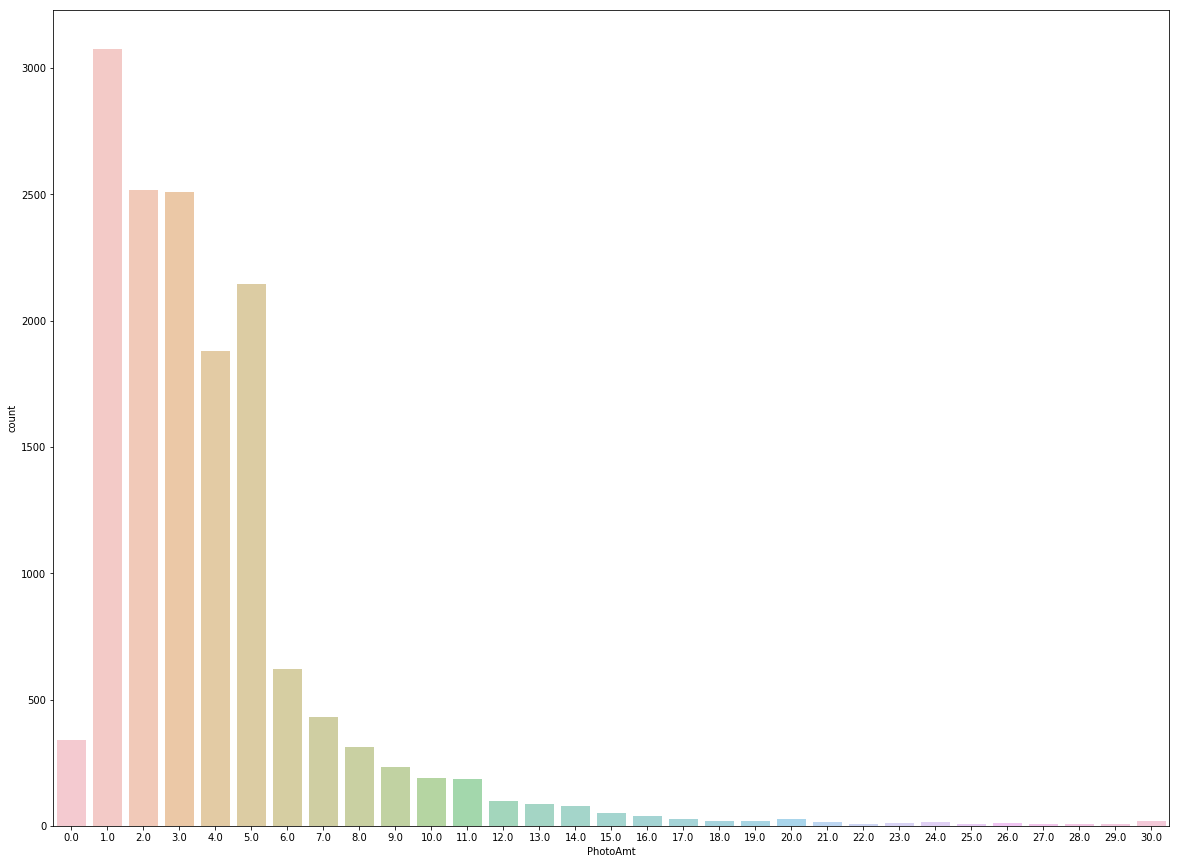

col :  AdoptionSpeed


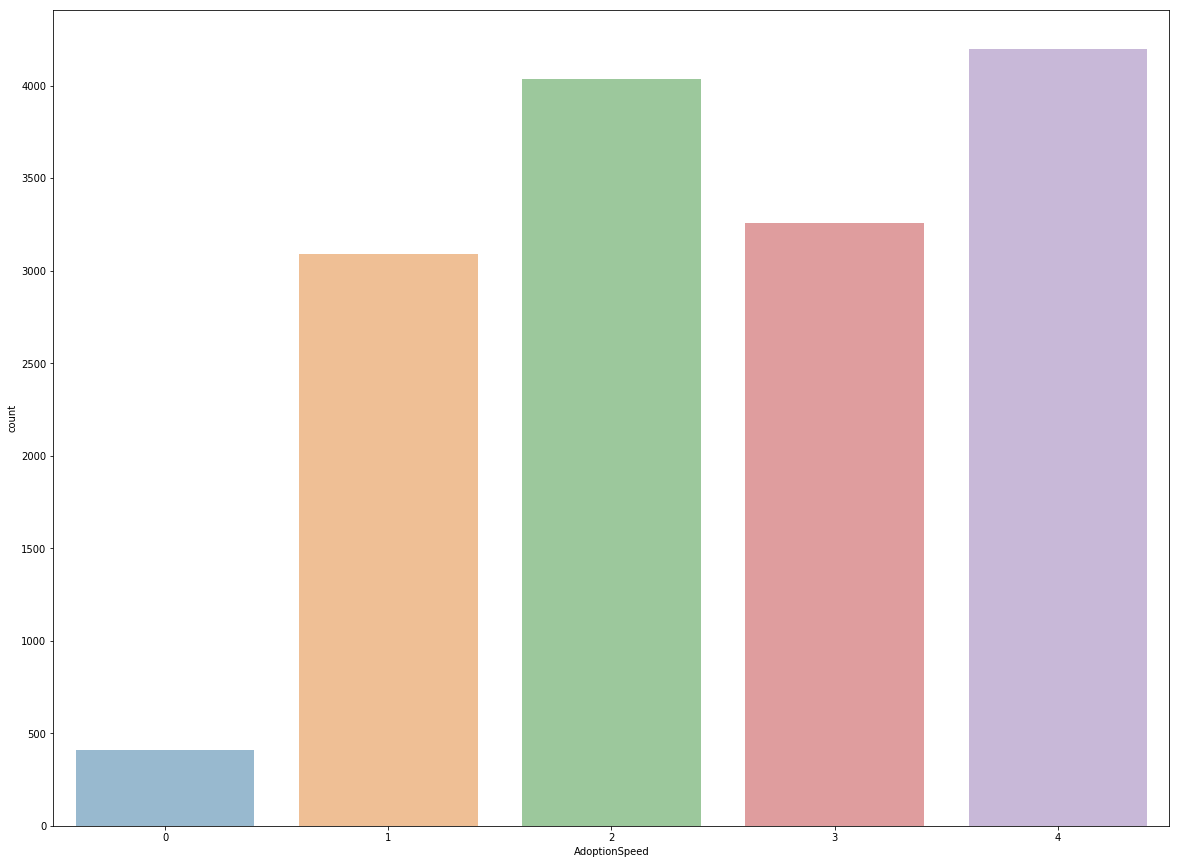

In [27]:
skip_cols = ['Name', 'RescuerID', 'Description', 'PetID']
for col in trn.columns:
    # 출력에 너무 시간이 많이 걸리는 두 변수는 skip
    if col in skip_cols:
        continue
        
    # 보기 편하게 영역 구분 및 변수명 출력
    print('='*50)
    print('col : ', col)
    
    # 그래프 크기 (figsize) 설정
    f, ax = plt.subplots(figsize=(20, 15))
    # seaborn을 사용한 막대그래프 생성
    sns.countplot(x=col, data=trn, alpha=0.5)
    # show() 함수를 통해 시각화
    plt.show()

In [ ]:
#Age의 경우 12개월 이전에 많이 분포되어있고 12개월 단위로 수치의값이 높다(정확한 개월수라기 보다 년단위로 대략적으로 측정한 듯 보임)
#Breed1, Breed2의 경우 특정종에 몰려있음
#color0은 항상높음
##가설1 MaturitySize * Type 에 따른 AdoptionSpeed 차이가 있을까?
#Vaccinated : 예방접종
#Dewormed : 구충??
#Sterilized : 살균
#Health : 1 = Healthy 가 거의 대부분인데 신뢰할수있는 정보인가 Minor Injury와의 차이는
##가설2 Health 에 따른 AdoptionSpeed 차이는 반드시 있을것이다
# state 는 주요 도시가 따로 있음 
##가설3 state * Type 에 따른 AdoptionSpeed 차이가 있을까?
# VideoAmt는 거의 없다 PhotoAmt 는 등록된게 많을수록 target 에 미치는 영향이 있을까?


In [51]:
### Evaluation
#Quadratic weight kappa에 대한 설명 & 이미지ㅣ


In [52]:
#카파는 두 명의 판사 A와 B가 각각의 N 개 항목을 K 개의 상호 배타적 인 범주로 일치시키는 정도를 측정합니다. 이러한 맥락에서 '판사'는 개인적인 인간, N 항목을 총체적으로 분류하는 개인 집단, 또는 컴퓨터 프로그램이나 진단 검사와 같은 특정 기관을 대상으로 분류를 수행하는 비인간적 인 기관 일 수 있습니다 기준

In [53]:
import numpy as np


def confusion_matrix(rater_a, rater_b, min_rating=None, max_rating=None):
    """
    Returns the confusion matrix between rater's ratings
    """
    assert(len(rater_a) == len(rater_b))
    if min_rating is None:
        min_rating = min(rater_a + rater_b)
    if max_rating is None:
        max_rating = max(rater_a + rater_b)
    num_ratings = int(max_rating - min_rating + 1)
    conf_mat = [[0 for i in range(num_ratings)]
                for j in range(num_ratings)]
    for a, b in zip(rater_a, rater_b):
        conf_mat[a - min_rating][b - min_rating] += 1
    return conf_mat

def quadratic_weighted_kappa(rater_a, rater_b, min_rating=None, max_rating=None):
    """
    Calculates the quadratic weighted kappa
    quadratic_weighted_kappa calculates the quadratic weighted kappa
    value, which is a measure of inter-rater agreement between two raters
    that provide discrete numeric ratings.  Potential values range from -1
    (representing complete disagreement) to 1 (representing complete
    agreement).  A kappa value of 0 is expected if all agreement is due to
    chance.
    quadratic_weighted_kappa(rater_a, rater_b), where rater_a and rater_b
    each correspond to a list of integer ratings.  These lists must have the
    same length.
    The ratings should be integers, and it is assumed that they contain
    the complete range of possible ratings.
    quadratic_weighted_kappa(X, min_rating, max_rating), where min_rating
    is the minimum possible rating, and max_rating is the maximum possible
    rating
    """
    rater_a = np.array(rater_a, dtype=int)
    rater_b = np.array(rater_b, dtype=int)
    assert(len(rater_a) == len(rater_b))
    if min_rating is None:
        min_rating = min(min(rater_a), min(rater_b))
    if max_rating is None:
        max_rating = max(max(rater_a), max(rater_b))
    conf_mat = confusion_matrix(rater_a, rater_b,
                                min_rating, max_rating)
    num_ratings = len(conf_mat)
    num_scored_items = float(len(rater_a))

    hist_rater_a = histogram(rater_a, min_rating, max_rating)
    hist_rater_b = histogram(rater_b, min_rating, max_rating)

    numerator = 0.0
    denominator = 0.0

    for i in range(num_ratings):
        for j in range(num_ratings):
            expected_count = (hist_rater_a[i] * hist_rater_b[j]
                              / num_scored_items)
            d = pow(i - j, 2.0) / pow(num_ratings - 1, 2.0)
            numerator += d * conf_mat[i][j] / num_scored_items
            denominator += d * expected_count / num_scored_items

    return 1.0 - numerator / denominator

#https://github.com/benhamner/Metrics/blob/master/Python/ml_metrics/quadratic_weighted_kappa.py

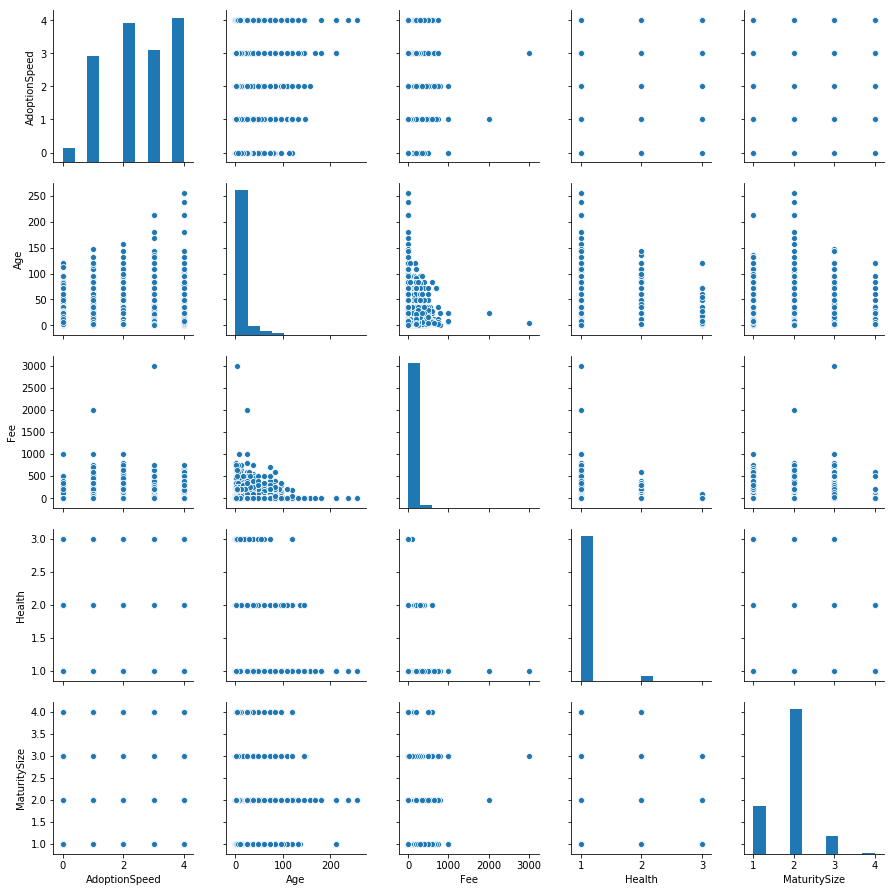

In [56]:
df_numeric = df[['AdoptionSpeed', 'Age', 'Fee', 'Health', 'MaturitySize']]
sns.pairplot(df_numeric)

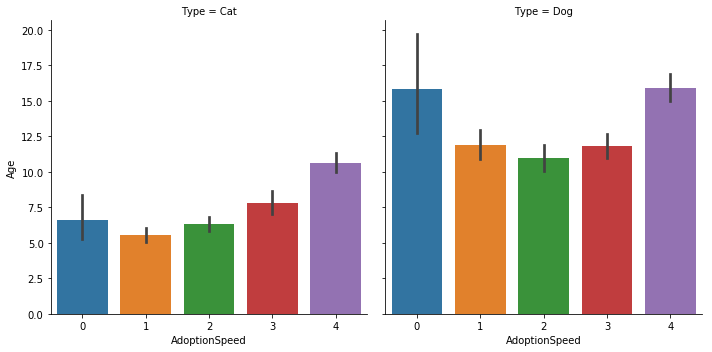

In [57]:
sns.catplot(x='AdoptionSpeed', y='Age', kind='bar', col='Type', data=df)

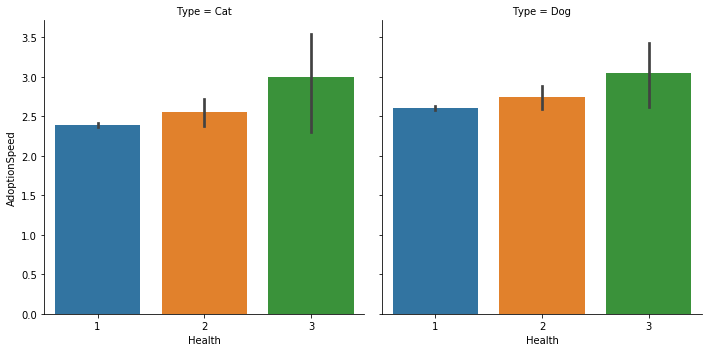

In [58]:
sns.catplot(x='Health', y='AdoptionSpeed', kind='bar', col='Type', data=df)

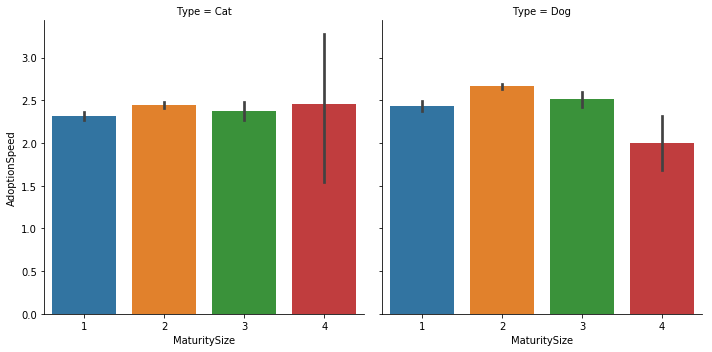

In [59]:
sns.catplot(x='MaturitySize', y='AdoptionSpeed', kind='bar', col='Type', data=df);

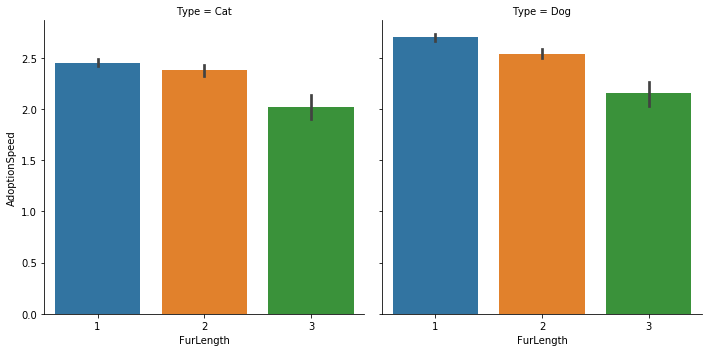

In [60]:
sns.catplot(x='FurLength', y='AdoptionSpeed', kind='bar', col='Type', data=df_implicit);

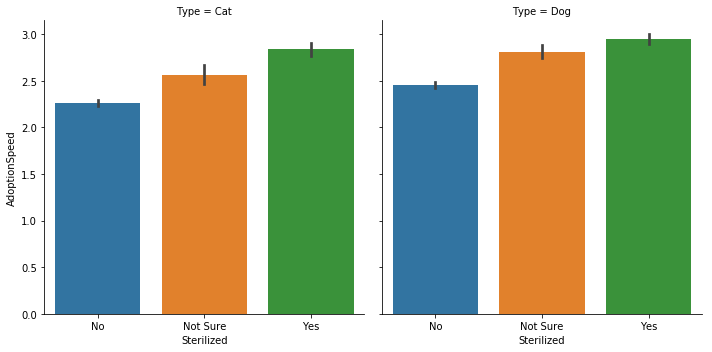

In [61]:
sns.catplot(x='Sterilized', y='AdoptionSpeed', kind='bar', col='Type', data=df);

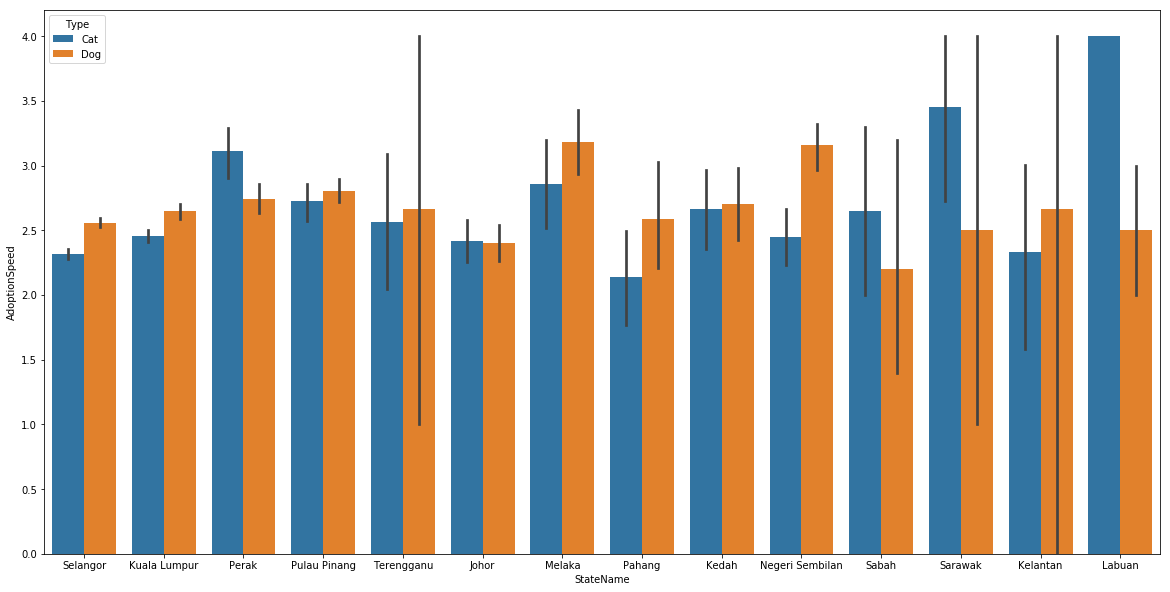

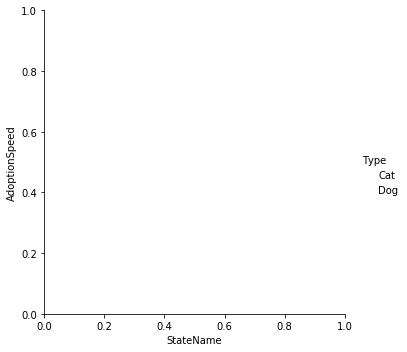

In [63]:
_, ax = plt.subplots(figsize=(20, 10))
sns.catplot(ax=ax, x='StateName', y='AdoptionSpeed', kind='bar', hue='Type', data=df_implicit);

In [64]:
# state 별로 강아지와 고양이를 선호가 확연히 차이가 남
# Hierarchical Bayesian orinal logistic을 쓸때 가장 상위 Hierarchy에 위치할 필요 있음

In [66]:
df = df.assign(Fee_free = df.Fee ==0)

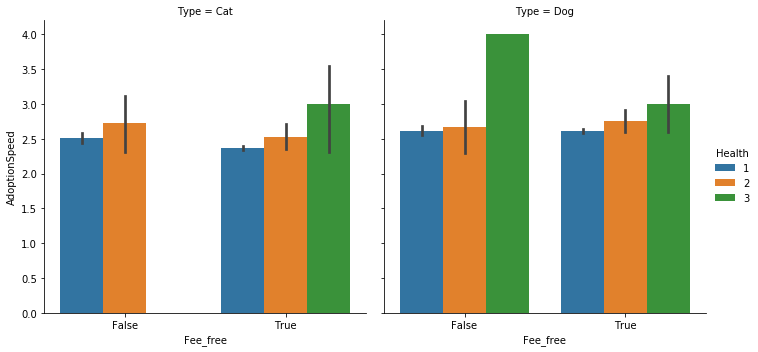

In [67]:
sns.catplot(x='Fee_free', y='AdoptionSpeed', kind='bar', hue='Health', col='Type', data=df);

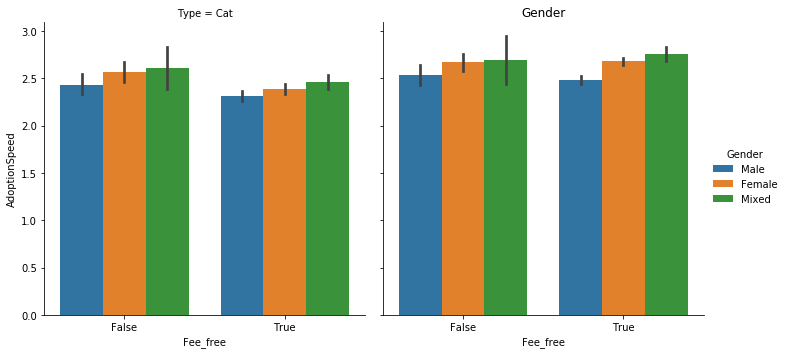

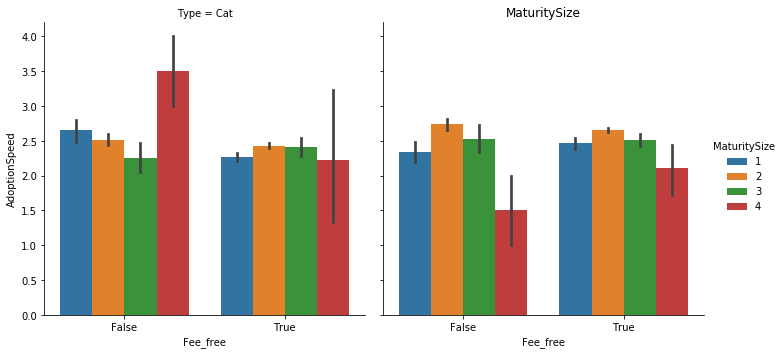

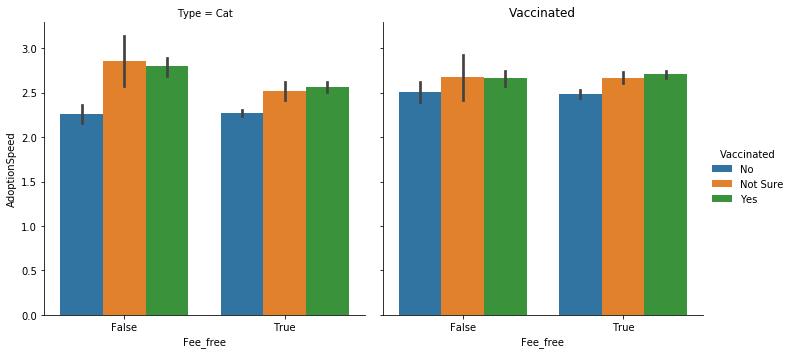

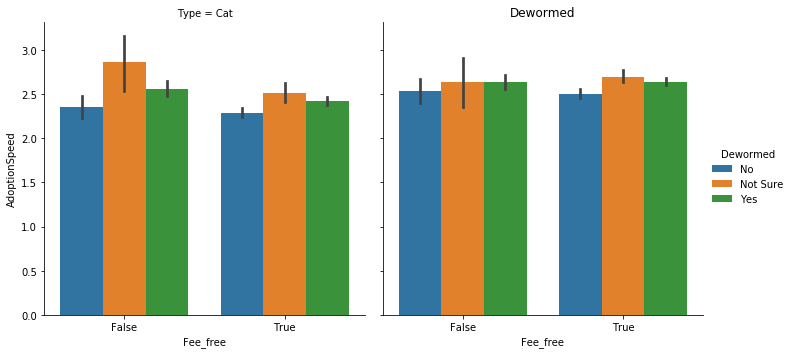

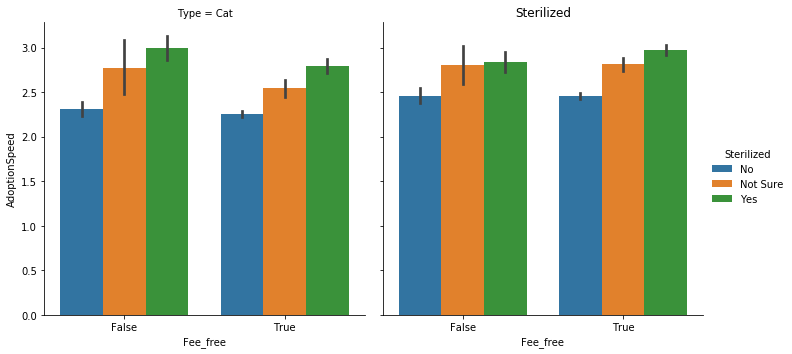

In [68]:
for col in ['Gender', 'MaturitySize', 'Vaccinated', 'Dewormed', 'Sterilized']:
    sns.catplot(x='Fee_free', y='AdoptionSpeed', kind='bar', hue=col, col='Type', data=df)
    plt.title(col);

In [ ]:
# Health, Maturity

In [69]:
df = df.replace({
    'MaturitySize': {1: 'Small', 2: 'Medium', 3: 'Large', 4: 'Extra Large', 0:'Not Specified'},
    'FurLength': {1:'Short', 2: 'Medium', 3: 'Long', 0: 'Not Specified'},
    'Health': {1: 'Healthy', 2: 'Minor Injury', 3: 'Serious Injury', 0: 'Not Specified'}
})

In [70]:
df.Health.value_counts(normalize=True)

Healthy           0.965651
Minor Injury      0.032082
Serious Injury    0.002268
Name: Health, dtype: float64

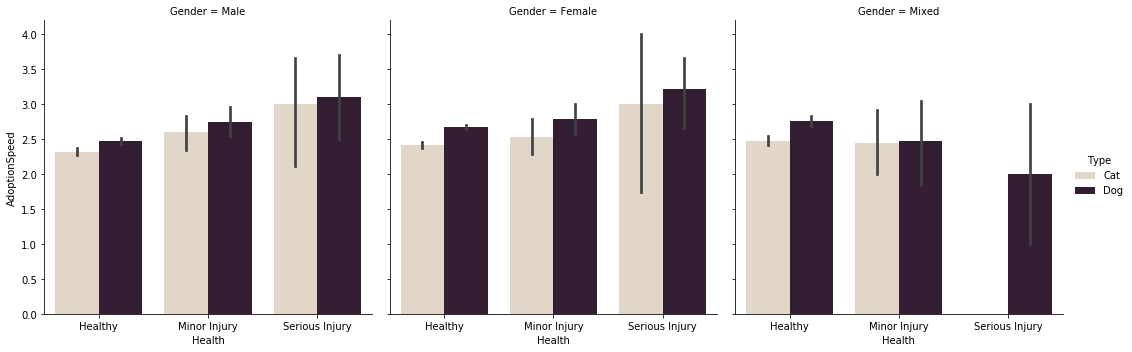

In [71]:
sns.catplot(x="Health", y="AdoptionSpeed", kind='bar', hue='Type', col='Gender', palette="ch:.25",data=df);

In [75]:
sns.kdeplot(df.loc[(df.is_train) & (df.Type=='Dog'), 'Age'])
sns.kdeplot(df.loc[(df.is_train) & (df.Type=='Cat'), 'Age'])
plt.xlim(0, 20)
plt.legend(['Dog', 'Cat']);

AttributeError: 'DataFrame' object has no attribute 'is_train'